# HEART DISEASE  

#### By : Nuwaiyr Alsubaie :)


In [154]:
from IPython.display import Image
Image(url= "Heart2.jpg", width=1000, height=10)

# Introduction

World Health Organization has estimated 12 million deaths occur worldwide, every year due to Heart diseases. Half the deaths in the United States and other developed countries are due to cardio vascular diseases. The early prognosis of cardiovascular diseases can aid in making decisions on lifestyle changes in high risk patients and in turn reduce the complications. This Project intends to pinpoint the most relevant/risk factors of heart disease as well as predict the overall risk using logistic regression --> This  aims to predict whether patient have 10 year risk of coronary heart disease CHD or not

# Data

The dataset is publically available on the Kaggle website, and it is from an ongoing cardiovascular study on residents of the town of Framingham . https://www.kaggle.com/christofel04/cardiovascular-study-dataset-predict-heart-disea


# ** Data Preparation & Cleaning **


In [155]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

%matplotlib inline

from sklearn.model_selection import train_test_split

In [156]:
heart= pd.read_csv('train.csv')
heart.head(10)

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
5,5,61,3.0,F,NO,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1
6,6,61,1.0,M,NO,0.0,0.0,0,1,0,238.0,232.0,136.0,24.83,75.0,79.0,0
7,7,36,4.0,M,YES,35.0,0.0,0,0,0,295.0,102.0,68.0,28.15,60.0,63.0,0
8,8,41,2.0,F,YES,20.0,NaN,0,0,0,220.0,126.0,78.0,20.70,86.0,79.0,0
9,9,55,2.0,F,NO,0.0,0.0,0,1,0,326.0,144.0,81.0,25.71,85.0,NaN,0


# ** EDA **


In [157]:
heart.drop(['id','education'] , axis='columns', inplace=True)#uncessry
heart.head()

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,36,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


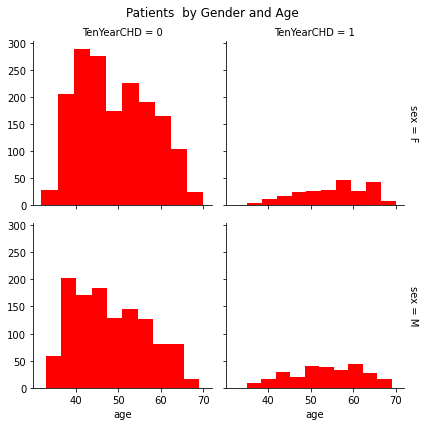

In [158]:
g = sns.FacetGrid(heart, col='TenYearCHD', row='sex', margin_titles=True)
g.map(plt.hist, 'age', color='red')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Patients  by Gender and Age');

### Feature Engineering  

In [159]:
df.TenYearCHD.value_counts()#unbalanced !!

0    2547
1     457
Name: TenYearCHD, dtype: int64

In [160]:
h2 = pd.get_dummies(heart,
                   columns = ['sex', 'is_smoking'])
h2.drop(['sex_F', 'is_smoking_NO'], axis=1,inplace=True)
h2.rename(columns = {'sex_M': 'sex', 'is_smoking_YES': 'is_smoking'}, inplace=True)

h2.head()

,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,sex,is_smoking
0,64,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1,0,1
1,36,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0,1,0
2,46,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0,0,1
3,50,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1,1,1
4,64,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0,0,1


In [161]:
df = h2.dropna(how='any',axis=0)
df.isnull().sum()


age                0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
sex                0
is_smoking         0
dtype: int64

### Statistical Summary:

In [162]:
df.describe()

,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,sex,is_smoking
count,3004.000000,3004.000000,3004.000000,3004.000000,3004.000000,3004.000000,3004.000000,3004.000000,3004.000000,3004.000000,3004.000000,3004.000000,3004.000000,3004.000000,3004.000000
mean,49.521305,9.078562,0.030293,0.005992,0.314913,0.027297,237.222370,132.591711,82.923103,25.824041,75.816911,81.993009,0.152130,0.448402,0.492676
std,8.595076,11.890855,0.171421,0.077189,0.464559,0.162974,45.267516,22.270882,12.038348,4.121130,11.937110,24.125814,0.359207,0.497413,0.500030
min,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.960000,45.000000,40.000000,0.000000,0.000000,0.000000
25%,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,74.500000,23.057500,68.000000,71.000000,0.000000,0.000000,0.000000
50%,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.500000,82.000000,25.410000,75.000000,78.000000,0.000000,0.000000,0.000000
75%,56.000000,20.000000,0.000000,0.000000,1.000000,0.000000,265.000000,144.000000,90.000000,28.072500,83.000000,87.000000,0.000000,1.000000,1.000000
max,70.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

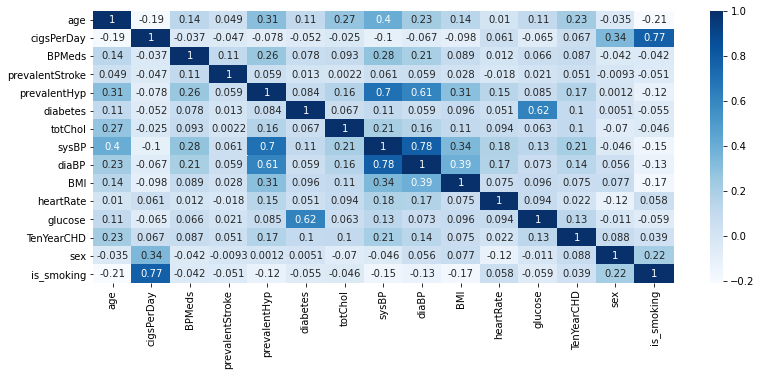

In [163]:
plt.figure(figsize=[13,5])
corr = df.corr()
sns.heatmap(corr, cmap="Blues", annot=True)


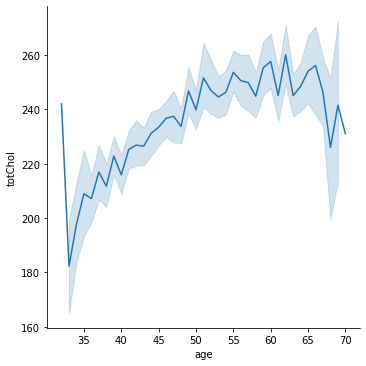

In [164]:

g = sns.relplot(x="age", y="totChol", kind="line", data=df)


In [165]:
mask = (df['age']< 35) & (df['totChol'] > 160)
new=df[mask]
new['age'].value_counts()#risk of CHD inherent 

34    13
33     4
32     1
Name: age, dtype: int64

#  ** Modeling & Testing  **

In [166]:
df.shape

(3004, 15)

In [167]:
#oversampling 
from imblearn.over_sampling import SMOTE


In [168]:
oversampling=SMOTE()
X,y=oversampling.fit_resample(df.drop(['TenYearCHD'], axis = 1),df['TenYearCHD'])#

In [169]:
X.shape


(5094, 14)

In [170]:
# modeling imports
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn import metrics


std_scale = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size = 0.2, random_state=42)
X_train_scaled = std_scale.fit_transform(X_train)#df.drop(['TenYearCHD'], axis = 1)
lm = LogisticRegression(C=1000)

lm.fit(X_train_scaled ,y_train)
lm.score(X_train_scaled ,y_train)
X_test_scaled = std_scale.fit_transform(X_test)
y_pre=lm.predict(X_test_scaled)
print(metrics.recall_score(y_test,y_pre))
print(metrics.f1_score(y_test,y_pre))

0.6673387096774194
0.6490196078431372


## f-score of the logistic classification is acceptable 

I PREFER TO use another algorithm to improve F-Score

Add More feature